Видалено 505 рядків з аномальними значеннями.
Візуалізація кореляційної матриці


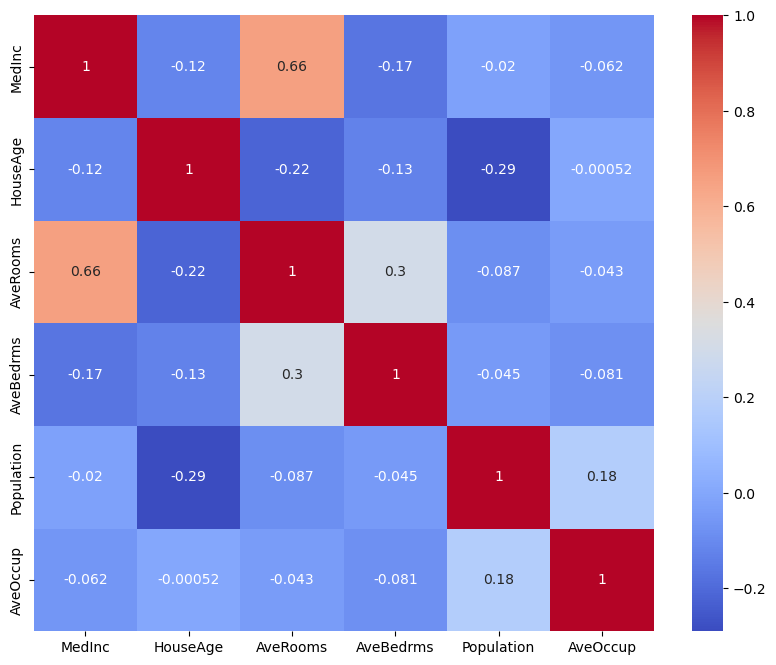

R2: 0.65 | MAE: 0.51 | MAPE: 0.30
Попередні результати: R2: 0.61 | MAE: 0.52 | MAPE: 0.31
Нові результати:     R2: 0.65 | MAE: 0.51 | MAPE: 0.30


'\nВИСНОВКИ:\n    \n1. R2 (Коефіцієнт детермінації):\n\n    Показник R2 покращився з 0.61 до 0.65, що свідчить про те, що модель тепер\n    краще пояснює варіацію в цільовій змінній. Тобто приблизно 65% варіацій у \n    цільовій змінній (вартість житла) пояснюються обраними ознаками після \n    очищення від викидів і нормалізації даних, що є кращим результатом \n    порівняно з попереднім.\n\n2. MAE (Середня абсолютна похибка):\n    \n    MAE трохи зменшився з 0.52 до 0.51, що свідчить про невелике зменшення \n    середньої похибки в прогнозах моделі. Це означає, що модель стала точнішою\n    у прогнозуванні вартості житла.\n\n3. MAPE (Середній абсолютний відсоток похибки):\n    \n    MAPE також зменшився з 31% до 30%, що означає, що модель тепер робить \n    трохи менше відносних похибок у прогнозах.\n    \nЦе покращення підтверджує, що обробка даних, зокрема очищення від викидів та \nнормалізація, позитивно вплинула на модель, хоч і не дуже значно.\n\n'

In [1]:
# 1. імпортуємо необхідні пакети

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.datasets import fetch_california_housing
from scipy.stats import zscore

#%%
# 2. Завантажуємо данні та видаляємо стовпець MedHouseVal, який містить 
# середню вартість житла, і зберігаємо в окрему змінну target. 
# Цей стовпець є цільовою змінною, яку ми будемо прогнозувати

california_housing = fetch_california_housing(as_frame=True)
data = california_housing['frame']
target = data.pop('MedHouseVal')

#%%
# 3. Додаткова обробка даних
# 3.1  Очистка від викидів для колонок AveRooms, AveBedrms, AveOccup
# та Population
def remove_outliers(df, columns):
    z_scores = df[columns].apply(zscore)
    # Створюємо маску для видалення рядків з аномаліями
    return ~(np.abs(z_scores) > 3).any(axis=1)

# Колонки, які аналізуємо на викиди
features_of_interest = ['AveRooms', 'AveBedrms', 'AveOccup', 'Population']

# Маска для видалення аномальних рядків
outliers_mask = remove_outliers(data, features_of_interest)

# Застосовуємо маску для даних і цільової змінної
data_cleaned = data[outliers_mask]
target_cleaned = target[outliers_mask]

print(f'Видалено {len(data) - len(data_cleaned)} рядків з аномальними значеннями.')

#%%
# 3.2 Видалення високо корельованої ознаки
# Побудуємо кореляційну матрицю після очистки від викидів
corr_matrix = data_cleaned.drop(['Longitude', 'Latitude'], axis=1).corr()

# Візуалізація кореляційної матриці
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
print('Візуалізація кореляційної матриці')
plt.show()

# Видалимо ознаку з найвищою кореляцією AveRooms, яка має високу кореляцію
# з іншою ознакою AveBedrms

data_cleaned = data_cleaned.drop('AveRooms', axis=1)


#%%
# 4. Розподілимо дані на навчальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(
    data_cleaned, target_cleaned, test_size=0.2, random_state=42)
#%%
# 5. Нормалізуємо дані

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#%%
# 6. Побудова та навчання моделі
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#%% 
# 7. Оцінимо показники моделі
y_pred = model.predict(X_test_scaled)

r_sq = model.score(X_test_scaled, y_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'R2: {r_sq:.2f} | MAE: {mae:.2f} | MAPE: {mape:.2f}')

#%%
# 8.Порівняємо нові метрики з попередніми метриками моделі

print("Попередні результати: R2: 0.61 | MAE: 0.52 | MAPE: 0.31")
print(f"Нові результати:     R2: {r_sq:.2f} | MAE: {mae:.2f} | MAPE: {mape:.2f}")

#%%

'''
ВИСНОВКИ:
    
1. R2 (Коефіцієнт детермінації):

    Показник R2 покращився з 0.61 до 0.65, що свідчить про те, що модель тепер
    краще пояснює варіацію в цільовій змінній. Тобто приблизно 65% варіацій у 
    цільовій змінній (вартість житла) пояснюються обраними ознаками після 
    очищення від викидів і нормалізації даних, що є кращим результатом 
    порівняно з попереднім.

2. MAE (Середня абсолютна похибка):
    
    MAE трохи зменшився з 0.52 до 0.51, що свідчить про невелике зменшення 
    середньої похибки в прогнозах моделі. Це означає, що модель стала точнішою
    у прогнозуванні вартості житла.

3. MAPE (Середній абсолютний відсоток похибки):
    
    MAPE також зменшився з 31% до 30%, що означає, що модель тепер робить 
    трохи менше відносних похибок у прогнозах.
    
Це покращення підтверджує, що обробка даних, зокрема очищення від викидів та 
нормалізація, позитивно вплинула на модель, хоч і не дуже значно.

'''

